# LENET ARCHITECTURE

In [12]:
import warnings
warnings.filterwarnings('ignore')
!pip install matplotlib
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [13]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.15.0


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [15]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 0 images belonging to 0 classes.


In [16]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(2, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision()])
MODEL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [25]:
for layer in MODEL.layers:
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        print(f'Layer: {layer.name}, Weights Shape: {weights.shape}')
        print(weights)

Layer: conv2d_2, Weights Shape: (3, 3, 3, 32)
[[[[ 3.22829474e-05  1.23242401e-01 -4.77753207e-03 -5.62374890e-02
     3.87163945e-02  5.14841601e-02 -5.85340001e-02  2.02720072e-02
    -1.24976046e-01  7.63322785e-02  1.00570768e-01  5.71887866e-02
    -1.00093102e-02 -4.28281389e-02  7.72574022e-02  2.56340168e-02
    -8.25969130e-02  6.66395575e-02  4.76715937e-02 -6.48667514e-02
    -4.41692993e-02 -1.18070394e-02  9.33232531e-02 -1.34894019e-02
     1.17429703e-01 -8.34396780e-02  3.93257849e-02  8.67339969e-02
    -1.19188376e-01  1.14891887e-01 -4.53352695e-04  9.47996527e-02]
   [ 1.29119545e-01  6.59523755e-02  6.74915984e-02 -7.30688050e-02
     5.66383712e-02 -6.70527294e-02  6.77926093e-02 -3.66173051e-02
     1.02161907e-01 -5.79170510e-02  1.23336380e-02  9.17646661e-02
     5.18068299e-02  5.56418113e-02 -1.29190654e-01  5.56538887e-02
     1.25453323e-01 -1.30198449e-01 -1.16940506e-03  7.47156283e-03
    -1.03672169e-01 -2.20391341e-02  1.15317136e-01 -6.42260835e-02
 

In [17]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [18]:
epochs = 100
batch_size = 512

In [19]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.6250 - precision_1: 0.6250
Epoch 1: accuracy improved from -inf to 0.62500, saving model to LENET.h5
3/3 [==============================] - 2s 452ms/step - loss: 0.6139 - accuracy: 0.6250 - precision_1: 0.6250
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8021 - precision_1: 0.8021
Epoch 2: accuracy improved from 0.62500 to 0.80208, saving model to LENET.h5
3/3 [==============================] - 1s 490ms/step - loss: 0.3859 - accuracy: 0.8021 - precision_1: 0.8021
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.1666 - accuracy: 0.9896 - precision_1: 0.9896
Epoch 3: accuracy improved from 0.80208 to 0.98958, saving model to LENET.h5
3/3 [==============================] - 2s 504ms/step - loss: 0.1666 - accuracy: 0.9896 - precision_1: 0.9896
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 1.0000 - preci

In [20]:
WORKING.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1'])

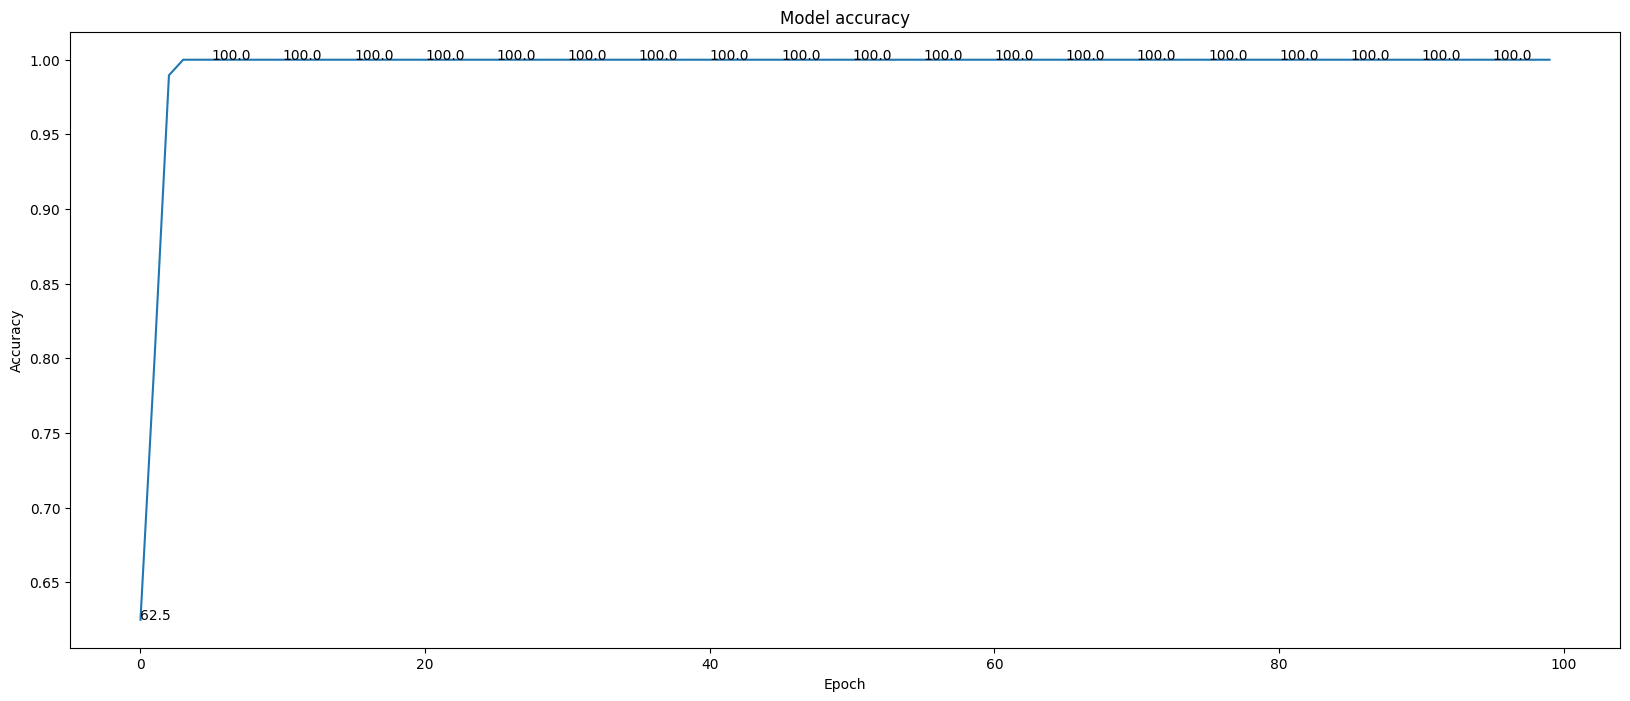

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

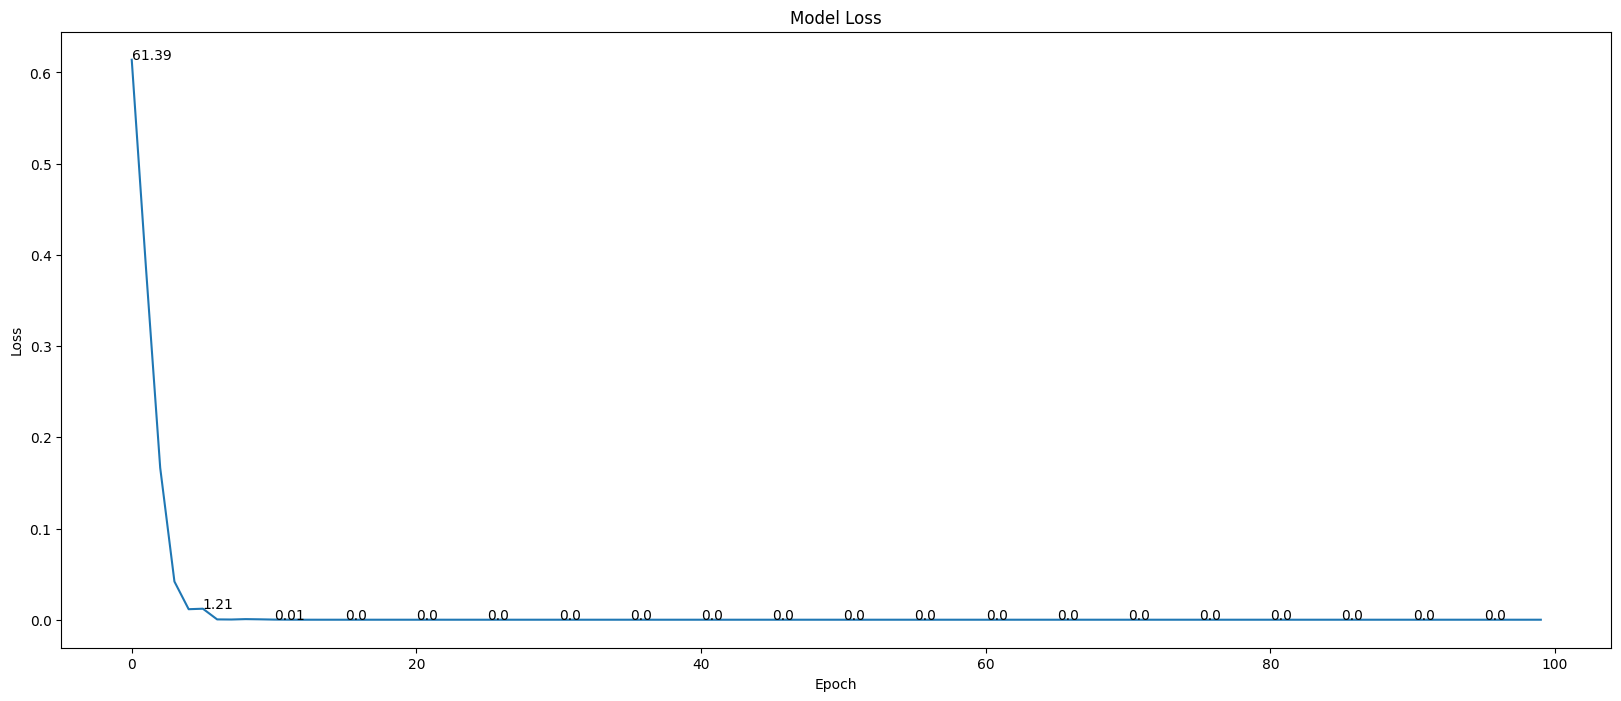

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()